<a href="https://colab.research.google.com/github/gritika18/ML_2.0/blob/main/3b_Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/MLCodeSession/student'

/content/drive/MyDrive/MLCodeSession/student


In [3]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [10]:
mathData = pd.read_csv('cleanedMathData.csv') #load the csv file as dataframe
mathData = mathData[['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime', 'studytime', 'absences', 'G1', 'G2', 'G3']]
mathData.head()

,school,sex,address,Mjob,Fjob,higher,freetime,studytime,absences,G1,G2,G3
0,1,1,1,1,5,1,3,2,6,5,6,6
1,1,1,1,1,3,1,3,2,4,5,5,6
2,1,1,1,1,3,1,3,2,10,7,8,10
3,1,1,1,2,4,1,2,3,2,15,14,15
4,1,1,1,3,3,1,3,2,4,6,10,10


#Data Visualization

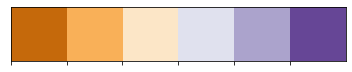

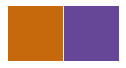

In [11]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
# pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
# pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

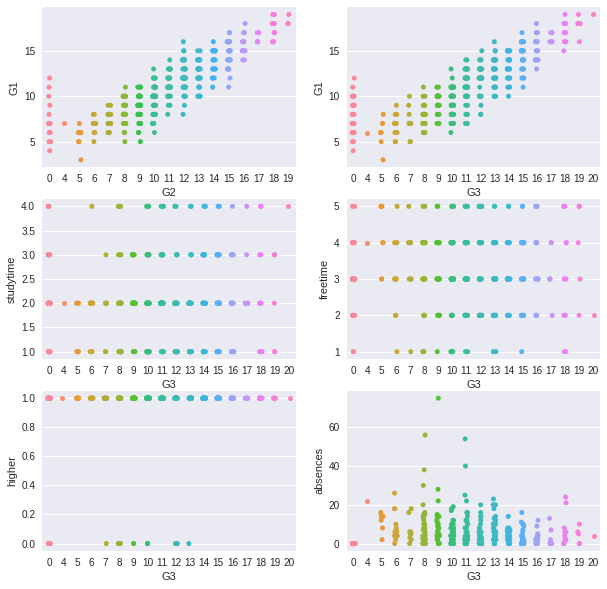

In [12]:
fig, axarr = plt.subplots(3,2, figsize=(10,10))

sns.stripplot(y='G1', x='G2', data=mathData, hue=None, ax=axarr[0][0])
sns.stripplot(y='G1', x='G3', data=mathData, hue=None, ax=axarr[0][1])
sns.stripplot(y='studytime', x='G3', data=mathData, hue=None, ax=axarr[1][0])
sns.stripplot(y='freetime', x='G3', data=mathData, hue=None,  ax=axarr[1][1])
sns.stripplot(y='higher', x='G3', data=mathData, hue=None, ax=axarr[2][0])
sns.stripplot(y='absences', x='G3', data=mathData, hue=None, ax=axarr[2][1])

#Data splits

In [13]:
#70-30 train-test percent split

trainDataset = mathData.sample(frac=0.7, random_state=0) 
testDataset = mathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
329       1    1        1     5     5  ...          3         4  14  14  14
318       1    1        0     1     4  ...          3         0  11  11  10
317       1    1        1     3     3  ...          3         9   9  10   9
65        1    1        1     5     4  ...          2         2  16  15  15
59        1    1        1     4     3  ...          2         2  15  16  16

[5 rows x 12 columns]
    school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
0        1    1        1     1     5  ...          2         6   5   6   6
9        1    0        1     3     3  ...          2         0  14  15  15
23       1    0        1     3     3  ...          2         0  13  13  12
25       1    1        1     4     4  ...          1        14   6   9   8
28       1    0        1     4     3  ...          2         4  11  11  11

[5 rows x 12 columns]


In [16]:
trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')
print(trainLabels.head())
print(testLabels.head())

print(trainFeatures.head())
print(testFeatures.head())


329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
0      6
9     15
23    12
25     8
28    11
Name: G3, dtype: int64
     school  sex  address  Mjob  Fjob  ...  freetime  studytime  absences  G1  G2
329       1    1        1     5     5  ...         3          3         4  14  14
318       1    1        0     1     4  ...         3          3         0  11  11
317       1    1        1     3     3  ...         3          3         9   9  10
65        1    1        1     5     4  ...         4          2         2  16  15
59        1    1        1     4     3  ...         2          2         2  15  16

[5 rows x 11 columns]
    school  sex  address  Mjob  Fjob  ...  freetime  studytime  absences  G1  G2
0        1    1        1     1     5  ...         3          2         6   5   6
9        1    0        1     3     3  ...         5          2         0  14  15
23       1    0        1     3     3  ...         4          2         0  13  13
25       1    1     

#Model Development

In [17]:
import math
numFeatures = len(testFeatures.columns)
inputNeurons = math.ceil(2*(numFeatures)/3)

print(inputNeurons)

8


In [18]:
model = tf.keras.Sequential([
                          tf.keras.layers.Dense(units=inputNeurons, activation="relu"),
                          tf.keras.layers.Dense(units=2*inputNeurons, activation="relu"),
                          tf.keras.layers.Dense(1)
])

In [20]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="mean_absolute_error",
    metrics=['mae', 'mse']
)

In [21]:
numEpochs = 2000
history = model.fit(x = trainFeatures, y = trainLabels, validation_data=(testFeatures, testLabels), epochs=numEpochs)

Epoch 1/2000
9/9 [==============================] - 1s 36ms/step - loss: 9.8402 - mae: 9.8402 - mse: 114.0191 - val_loss: 9.7854 - val_mae: 9.7854 - val_mse: 108.9486
Epoch 2/2000
9/9 [==============================] - 0s 8ms/step - loss: 8.8087 - mae: 8.8087 - mse: 91.9061 - val_loss: 8.6603 - val_mae: 8.6603 - val_mse: 85.7531
Epoch 3/2000
9/9 [==============================] - 0s 7ms/step - loss: 7.7350 - mae: 7.7350 - mse: 70.7563 - val_loss: 7.4877 - val_mae: 7.4877 - val_mse: 64.9151
Epoch 4/2000
9/9 [==============================] - 0s 5ms/step - loss: 6.6395 - mae: 6.6395 - mse: 53.3230 - val_loss: 6.2440 - val_mae: 6.2440 - val_mse: 46.4780
Epoch 5/2000
9/9 [==============================] - 0s 8ms/step - loss: 5.4738 - mae: 5.4738 - mse: 38.4091 - val_loss: 4.9221 - val_mae: 4.9221 - val_mse: 31.0315
Epoch 6/2000
9/9 [==============================] - 0s 5ms/step - loss: 4.2677 - mae: 4.2677 - mse: 26.4801 - val_loss: 3.5830 - val_mae: 3.5830 - val_mse: 19.8311
Epoch 7/2000


#Result Analysis

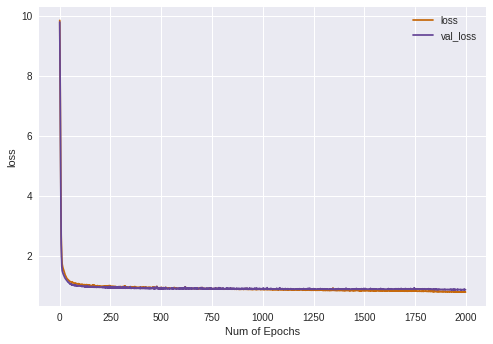

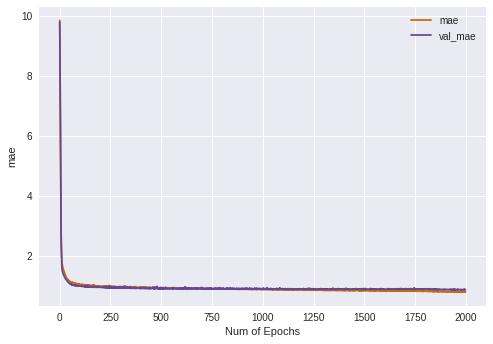

In [22]:
#Plot Functions

def plotGraph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel('Num of Epochs')
  plt.ylabel(string)
  plt.legend([string, f'val_{string}'])
  plt.show()


plotGraph(history, 'loss')  
plotGraph(history, 'mae')

In [23]:
testPreds = model.predict(testFeatures).flatten()
print(testPreds)

[ 6.0734973  14.95575    12.954812    8.74452    11.045579   16.178898
 16.143887   15.947654   12.12101    13.430634   11.95671    17.769905
  7.3037214  19.043652   15.063681   12.904835   10.245879   15.338449
 10.082856    9.988656   15.9753275  15.08607     5.8872924   6.381815
 10.080539   14.104626   10.210315   16.686998   13.253116    9.279022
 13.954198    6.7536983  10.956283   14.901595   13.9632845  13.392266
 13.940057   11.464128    6.399753    0.5146861  -0.08711149  0.5357933
 14.549333   11.180564    0.8279109  13.138807   10.161077   11.107869
 14.247915   11.182616   10.9768      3.8819976   8.120956    8.121382
  8.40223    12.081002   15.368531    8.353088    8.537932   15.032947
  9.037723    9.846998    9.247582    6.038818   11.815168    7.34081
 12.252749   15.706634   10.866043   -1.5363073  11.912133   -0.3347845
  9.963423   12.414819   11.383854   12.051564   16.053852    9.0167885
 10.418564    8.975241   14.38264     9.525701   11.047165    9.985474
 14.

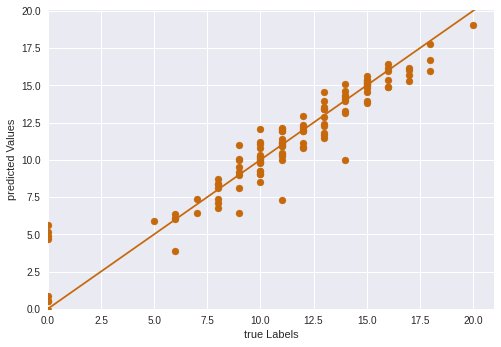

In [26]:
def predPlot(labels,preds):
  plt.scatter(labels, preds)
  plt.xlabel('true Labels')
  plt.ylabel('predicted Values')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.plot([-100, 100], [-100,100])
  plt.show()

predPlot(testLabels, testPreds)

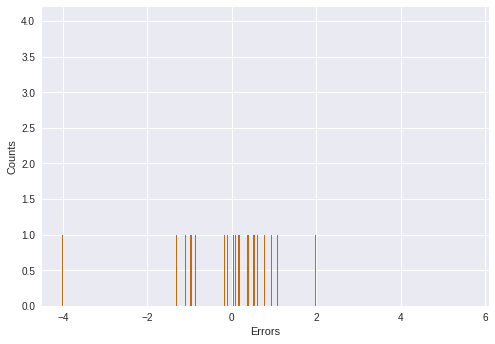

In [27]:
def errorPlot(preds, labels, counts):
  errors = testPreds - testLabels
  plt.hist(errors, counts)
  plt.ylabel('Counts')
  plt.xlabel('Errors')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

#Saving models

In [28]:
import os
modelName = f'model_01.h5'
model.save(f'{os.getcwd()}/{modelName}')

In [29]:
model = tf.keras.models.load_model(f'{os.getcwd()}/{modelName}')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
